Ashik Repon - BSc Computer Science - Artificial Intelligence Coursework 1 2020-2021 

<h3> Overview of the structure of the report <h3>

This report follows the **Deep Learning Worflow** throughout. 

This report does not follow a chronological order of events, it follows a rigid structure.

Numerical values obtained in the graphs from the **Main Experiments** section can be cross-referenced with the penultimate section - **Experimentation and Results Log**. 

The final section is the **Conclusion** section, which includes some sub-sections for individual reflection and findings about experiments, as well as a final conclusion. 

<h1> Problem Definition </h1>

Hypothesis: 

An attempt to predict the nature of the review of movies from a large dataset of movie reviews, with the primary objective of concluding whether a review is classified as positive or negative.

The **IMDB dataset** is a common Machine Learning application. This dataset consists of 50000 highly polarised moview reviews labelled either positive or negative

25000 training data, 25000 testing data. 

Each set has 50% positive reviews and 50% negative reviews.

This data is sufficiently informative to learn relationships between inputs and outputs

The type of this problem is a **binary classification** problem as the outcome will predict between two distinct classes (positive or negative)

In this problem, 1 represents a positive review label and 0 represent a negative review label.

The input for this problem will be moview review text in the form of tensors - the preprocessing of the input sample will be visited in more detail in the **data preparation** section. The output is a probability score predicting whether the review is negative or positive.





# Measure of accuracy 


According to Francois Chollet (2017. Deep Learning with Python (1st. ed.). Manning Publications Co., USA. ), for a binary classification problem like the IMDB problem, the best measure of success, or **loss function** choice is **binary cross entropy** combined with **sigmoid** as the last layer of activation. This is because, unlike using **softmax**, using this combination guarantees that calculating the difference between two probability distributions is efficient and independent for each of the two classes in question and is more appropriate for a binary classification problem.


# Evaluation protocol

During the experimentations, the primary intention is to maintain **hold-out validation** as numerically speaking, there is a lot of data to execute validation on. Depending on the results, other validations such as k-fold might be considered depending on the validation result. Hold-out validation should be suitable for this type of problem.

# Data preparation

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__, ' ', tf.keras.__version__)
#importing tensorflow and keras, and printing versions

2.3.0   2.4.0


Loading IMDB dataset

In [4]:
# download data: top 10000 most frequent words only, discard rare words
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


The limitation to 10,000 words is excluding rare or uncommon words to make the problem more manageable. 

<h3> Practical preparation of data </h3>

Data will have to be pre-processed into a form that the network understands. For a binary classification problem like the IMDB, it is necessary to scale the values in a reduced range such as [0,1]

In [5]:
#Networks only accept tensor inputs, not lists
#Hence we need to pre-process data 

import numpy as np #importing mathematics library

#Function to vectorise sample into tensors in the form of vectors
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #sets specific indices of results[i] to 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#One-hot encode samples and convert the labels to floating point valued tensors.
y_train = np.asarray(train_labels).astype('float32') #Vectorise training data
y_test = np.asarray(test_labels).astype('float32') #Vectorise test data

#Considerations made for validating data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:] 

The block of code above is responsible for encording the integer sequences provided by the data into a binary matrix that our network can understand. It is essential to provide the network a sample in a recognisable format to enable it to deduct useful representations when training occurs. Refer to the comments inside the block of code for more technical considerations.

The last 4 lines is responsible for slicing the data apart for validation, by setting apart 10000 samples from the original training data into validation data set and partial training set.

# Baseline

The minimum **statistical power** expectation for a binary classification problem such as the IMDB moview reviews problem must perform better than 50% accuracy.

# Network building

In this section, the main model for training will be defined. In the last section of this report all experiments will be logged. 

In all of the densely connected layers apart from the last one, the activation function used to execute linear affine transformations on the sample is **Relu**. The last layer is always **sigomoid** which produces the probability of matching likeliness.

The code below has served the purpose of drawing the results and plots available from the "Main Experiments" section. 

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers, losses
#Ideal model for the reduction of overfitting and high accuracy: 16-16-1
model = models.Sequential()
model.add(layers.Dense(512, 
                       kernel_regularizer=regularizers.l2(0.001),
                       activation = 'relu', 
                       input_shape = (10000,)
                       ))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, 
                       activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)
                       ))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 1024,
                    validation_data = (x_val, y_val)) 


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Function designed to plot values for comparision 
#plot loss will plot the loss of the validation data and the loss of the training data against epochs number
import matplotlib.pyplot as plt 
def plot_loss():
    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epochs = range(1, len(loss) + 1)
    blue_dots = 'bo'
    solid_blue_line = 'b'
    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('overfitting.eps', format = 'eps')
    plt.show()
#plot loss will plot the accuracy of the validation data and the loss of the training data against epochs number
def plot_acc():
    
    plt.clf()

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()




# Main experiments

<h3> Network Capacity: 2-2-1 </h3>

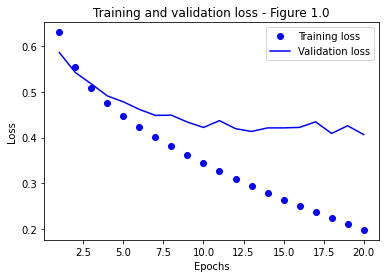

In [ ]:
#plot_loss()

The plot above is showing a trend in which training loss and validation loss are both lowering epoch by epoch. This is a sign of **underfitting**. Justifications to why this phenomena is occurring is very like due to the fact that the network capacity was very reduced (**2-2-1**)

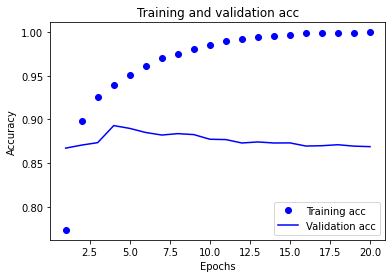

In [ ]:
#plot_acc()

The accuracy seems to increase at a very fast pace. There is an outlier in the graph with a very low accuracy which increments at a very fast pace. The validation accuracy is following a decreasing trend for the 2-2-1 network capacity.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<h3> Network capacity: 16-16-1 </h3>

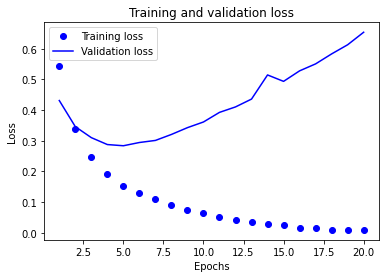

In [ ]:
#plot_loss()

The network capacity for this experiment is 16-16-1. **Overfitting** is occurring in the graph above. Around epoch 5 the graph starts to increase at a steady speed. There is a spike around epoch 15. The validation loss keeps on continously increasing. The training loss gradually decreases.

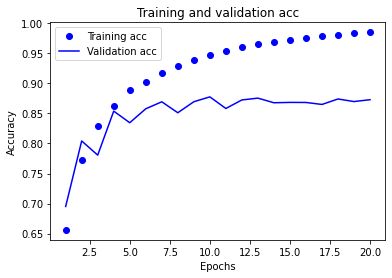

In [ ]:
#plot_acc()

The validation accuracy is higher compared to the previous model. There are some spikes in the trend between the 2nd and 10th epoch. The accuracy stabilizes around 0.85 accuracy around 12 epochs. (Network capacity 16-16-1)

<h3> Network capacity: 512-512-1 </h3>

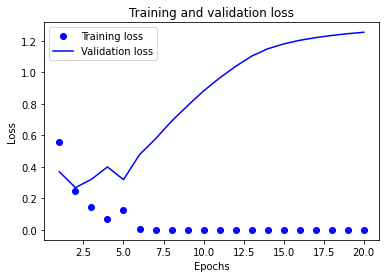

In [ ]:
#plot_loss()

The overfitting for the 512-512-1 capacity network is greater compared to all the other networks. It also toke the longest time in terms of training duration. We can deduct from this model and previous models that the **optimum training number revolves around 5**. Overfitting occurs very quickly in this model after epoch 5.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

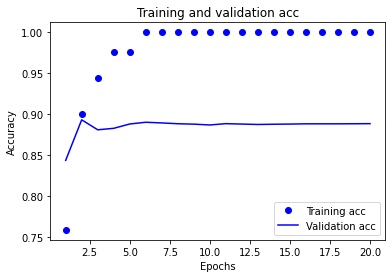

In [ ]:
#plot_acc()

The accuracy of the validation set stabilizes around 0.88/0.89 (**this data can be cross-referenced with the experiments table**) and stays constant for the rest of the epochs. The accuracy of the training data increases to optimal values. 

Deductions so far 
- Optimal training is around **5 epoch** 
- The 16-16-1 outputs the highest validation accuracy with **slower overfitting** compared to the other 2 models.
- We have developed a model with an accuracy greater than baseline of 0.5

<h3> Hyperparameter tuning: Batch Size </h3>

Further hyperparameters experimenting: the extent to which the batch size has an effect on the best model so far in terms of validation accuracy and least overfitting will be tested. The reference model for these experimentationwill be a 16-16-1 capacity network with batch sizes 256 and 1024.

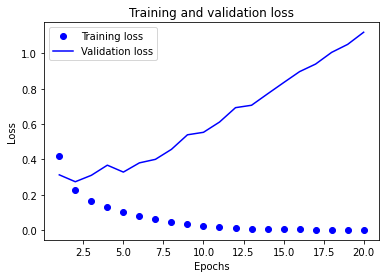

In [ ]:
#BATCH SIZE 256
#plot_loss()

Highest validation accuracy recorded so far at epoch 2 with batch size 256: (0.8918). Overfitting still present after epoch 2. 

Experimenting with batch size: 1024

In [ ]:
history_dict = history.history
history_dict.keys()
#UPDATE HISTORY

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

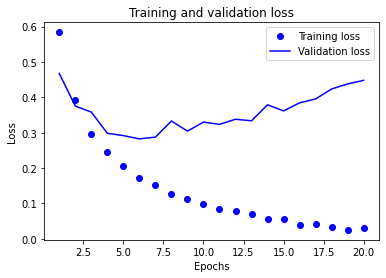

In [ ]:
#BATCH SIZE 1024
#plot_loss()

With batch size 1024, overfitting is less prominent compared to previous experimentations. Batch = 1024 will be taken in consideration in regularisation attempts in upcoming sections. Experimenting with 1024 as batch size slightly decreased overfitting compared to previous batch size.

<h3> Hyperparameter tuning: number of epochs </h3>

Next hyperparameter tuning, number of epochs. This section will explore the extent to which the number of epochs affects the validation accuracy of the training set.

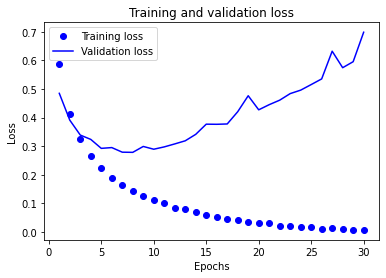

In [ ]:
 #plot_loss()

In [ ]:
history_dict = history.history
history_dict.keys()
#UPDATE HISTORY

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The plot above is representing the loss against epoch trend of **30** total epochs.

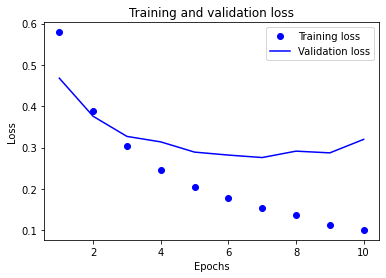

In [ ]:
#plot_loss()

The plot above is representing a loss against epoch trend number of **10** total epochs.

Keeping 10 as the number of epochs might not be informative as it could potentially not show exactly the point of overfitting and optimal epoch number. Hence, keeping 20 as the number of experiments will be a good indicator. When the number of epoch is set as 30, it is still visible from the graph that overfitting begins around 5 epochs, which is an information that was deducted before even when epochs number was set at 20 to begin with.

<h3> Hyperparameter tuning: Learning Rate </h3>

**Cross-reference with experimentation and log results table**

- The validation accuracy was under performing with high learning rate i.e. lr = 0.200 which has been experimented
- The learning rate works best in conjugation with the other hyperparameter settings when it is set at its lowest (lr = 0.001)

<h3> Further hyperparameter changes and model to regularise </h3>

There was a general feeling that the validation accuracy without regularisation could be improved. Therefore, another experiment has been conducted with a new number of hidden layer units which thankfully provided a better validation accuracy. This was a 32-32-1 network with 0.001 as learning rate, 1024 as batch size with 20 epochs. This model had the highest validation accuracy so far, which was of 0.8932, which is a good point to be in going into regularising tuning. 

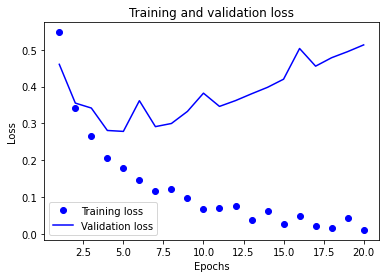

In [ ]:
#plot_loss()

In [ ]:
history_dict = history.history
history_dict.keys()
#UPDATE HISTORY

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The graph above shows the loss against epoch graph of the model that produced the highest validation accuracy without regularisation so far. There are some variations in the pattern. This graph also hits the lowest loss out of all the previous graphs of experiments.

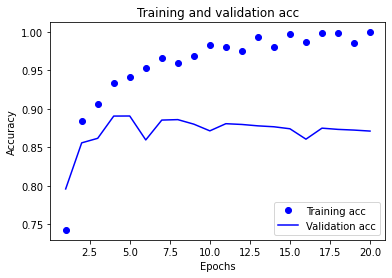

In [ ]:
#plot_acc()

The accuracy against epoch shows that max accuracy of this validation accuracy trend is very close to 0.90, which would be a good generalisation, and could increase the predictive power of this model.

<h3> Regularising Tuning </h3>

As the penultimate graph shows, overfitting is still an issue despite having a network which produced a fairly high validation accuracy after the optimal number of epochs. 

The more overfitting the network has, **the less generalisation** it will be able to make on the test data, hence the **predictive power** of the model will decrease. 

Steps that will be taken in consideration to regularise will include 
- Reduction of network size 
- Adding l2 regularisation
- Adding dropout layer

<h3> Reduction of network size from 32-32-1 to 16-16-1 <h3>

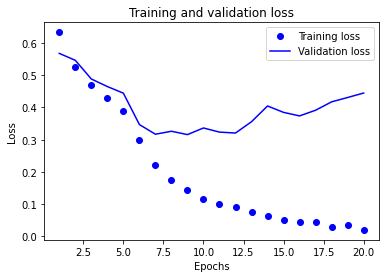

In [ ]:
#plot_loss()

In [ ]:
history_dict = history.history
history_dict.keys()
#UPDATE HISTORY

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

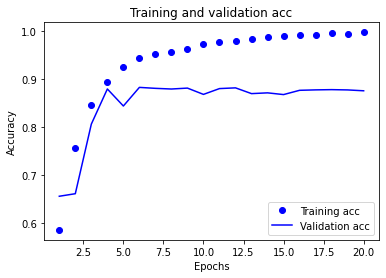

In [ ]:
#plot_acc()

Evaluation on network reduction: Overfitting has decreased as visible in the first graph plotting loss against epochs. This has been achieved by executing a reduction of the network. At the expense of the overfitting decrease, the accuracy of the validation set has decreased as well. Prior to the network size decrease, the accuracy of the validation set would be around 0.89 during the optimal epoch, now it is around 0.88.

<h3> Adding L2 regularisation<h3>

L2 regularisation has been added to both of the dense layers that now have 16 Hidden Layer Unit each using the command - kernel_regularizer=regularizers.l2(0.001) with the aim of reducing overfitting. The next two graphs will show the results of this addition. 

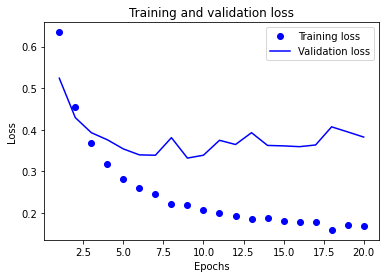

In [ ]:
#plot_loss()

In [ ]:
history_dict = history.history
history_dict.keys()
#UPDATE HISTORY

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

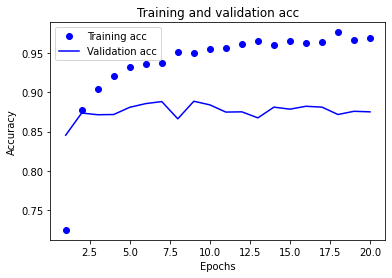

In [ ]:
#plot_acc()

Evaluation: After the application of the **L2 regularisation** on the the two dense relu activated layers on this network, the curve of overfitting has flattened even further. Which is a positive result. The accuracy of the validation is at its maximum around 0.88 (88%).With a large overfitting, the max accuracy was 89%. There is still a slight overfitting in the accuracy against epoch. 

<h3> Adding Dropout Layer<h3>

A drop out layer has been added between the two 16 unit dense relu activated layers to cure overfitting further. This section will show the results of this experiment. All experiments are also visible in the experimentation table for further correspondance on specific numerical values.

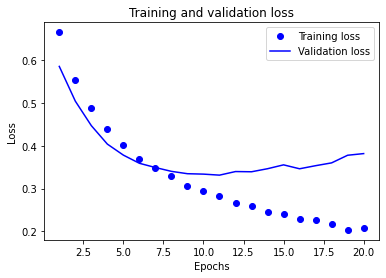

In [ ]:
#plot_loss()

In [ ]:
history_dict = history.history
history_dict.keys()
#UPDATE HISTORY


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

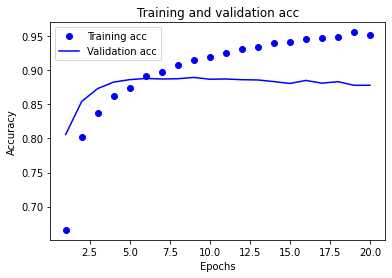

In [ ]:
#plot_acc()

Evaluation: This was the last regularisation step. As the graph of the loss plotted against epoch numbers shows overfitting has decreased considerably compared to the pre-regularisation model that had a capacity of 32-32-1. This model has potentially the highest statistical power so far. The accuracy overfitting has also been reduced. The training and validation accuracy are less apart compared to previous experimentation results. The highest recorded validation accuracy recorded for this model occured around epoch 9 (0.8893).

<h2> Model trained: Training on Test Data and Network Evaluation </h2>

The IMDB network has been trained to find optimal hyperparameter tunings. The network has also been equipped with experimented regularisation values that have been deployed in the validation sets during the experimentation. In the upcoming section, a new model will be constructed with the optimal values found from the experimentation phase. 

The ideal epoch number has been identified as 5 epochs. This information can be cross-referenced with the experimentation table at the end of this report. Dropout layer and L2 regularisations will also be kept in the final model along with batch size 1024 and the last regularised capacity of 16-16-1. 

<h3> New model using test set. </h3>

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers, losses

model = models.Sequential()
model.add(layers.Dense(16, 
                       kernel_regularizer=regularizers.l2(0.001),
                       activation = 'relu', 
                       input_shape = (10000,)
                       ))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, 
                       activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)
                       ))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics=['accuracy'])

model.fit(x_train, 
                    y_train,
                    epochs = 5,
                    batch_size = 1024)

Epoch 1/5
25/25 [==============================] - 2s 62ms/step - loss: 0.6204 - accuracy: 0.7002
Epoch 2/5
25/25 [==============================] - 1s 60ms/step - loss: 0.4770 - accuracy: 0.8171
Epoch 3/5
25/25 [==============================] - 1s 60ms/step - loss: 0.4045 - accuracy: 0.8613
Epoch 4/5
25/25 [==============================] - 1s 54ms/step - loss: 0.3587 - accuracy: 0.8895
Epoch 5/5
25/25 [==============================] - 1s 59ms/step - loss: 0.3298 - accuracy: 0.9037


Using a network with the hyperparameter tunings and regularisations identified, the loss achieved on the optimal epoch is 0.3298, the accuracy was 0.9037, this is high becuase it has been executed on the test data. The next step is to evaluate the statistical power of the network using the .evaluate command on the network. 

In [ ]:
#Results is a variable storing the evaluation on the network 
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.3282 - accuracy: 0.8886


[0.3281642198562622, 0.8885999917984009]

<h3> Discussion </h3>

Simple problems such as the IMBD dataset does not offer much accuracy gain, whereas a database such as ImageNet, which is a more complex problem, could potentially offer a more substantial gain. 


The loss achieved for the evaluation on the best network experimented in this report has produced a loss of 0.3281 and an accuracy of 0.8885 on the model.evaluate test. 

Currently, regularisation is not producing a gain in accuracy compared to models that are not regularised. For the purposes of further experimentation, another test will be conducted with a bigger network, which will be regularised using the same technique applied in the network up to the preliminary conclusion to see if the results contradict (or not) the tests that I have previously conducted. The aim is to achieve a gain in the validation accuracy and regularise at the same time. A network of size 512-512-1 will be used for this purpose.


<h2> Scaling up: Experimenting with Larger Networks </h2>

Further experimentation with a 512-512-1 network.

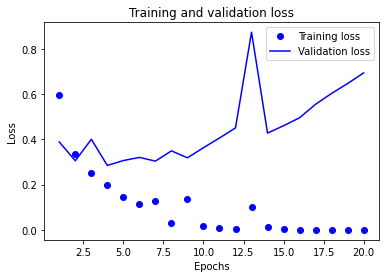

In [ ]:
#plot_loss()

In [ ]:
history_dict = history.history
history_dict.keys()
#UPDATE HISTORY

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

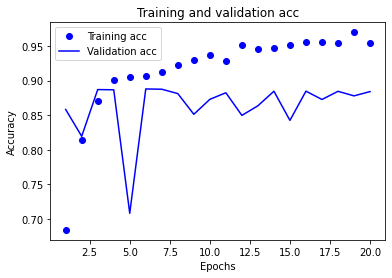

In [ ]:
#plot_acc()

The loss and accuracy plots above are representing the non-regularised graphs of the 512-512-1 capacity network. The next phase is to add the regularisation layers and adjustments. The accuracy plot is quite noisy. There is overfitting happening as regularisation has not been applied yet.

Regularise the 512-512-1 capacity network with Drop Out and L2 regularisation 

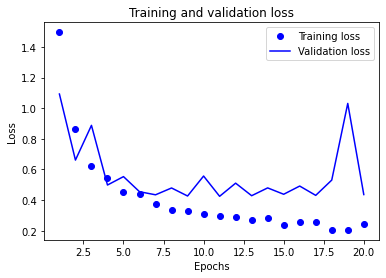

In [8]:
#plot_loss()

The network has been regularised and trained. The next stage is to build a new model to evaluate the statistical power in order to test whether there is any accuracy gain from regularisation on this larger network. The loss/epochs plot above is showing that overfitting has been reduced. The highest validation accuracy was at epoch 6 (0.8902). Therefore, the new network will be trained until 6 epochs which has been designated as the optimal number of epoch. The rest of the hyperparameter tunings and regularisations are the same as the 16-16-1 network trained in the previous experiments. The batch size is still 1024, learning rate still set at 0.001 and the activation function is still Relu given the fact that it proved effective so far.

<h3> Network trained. Create a new network to train on test data and evaluate performance. </h3>

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers, losses

model = models.Sequential()
model.add(layers.Dense(512, 
                       kernel_regularizer=regularizers.l2(0.001),
                       activation = 'relu', 
                       input_shape = (10000,)
                       ))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, 
                       activation = 'relu',
                       kernel_regularizer=regularizers.l2(0.001)
                       ))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics=['accuracy'])

model.fit(x_train, 
                    y_train,
                    epochs = 6,
                    batch_size = 1024)

Epoch 1/6
25/25 [==============================] - 10s 417ms/step - loss: 1.2685 - accuracy: 0.7356
Epoch 2/6
25/25 [==============================] - 10s 415ms/step - loss: 0.6543 - accuracy: 0.8611
Epoch 3/6
25/25 [==============================] - 10s 416ms/step - loss: 0.4823 - accuracy: 0.8902
Epoch 4/6
25/25 [==============================] - 10s 416ms/step - loss: 0.4094 - accuracy: 0.8962
Epoch 5/6
25/25 [==============================] - 10s 416ms/step - loss: 0.3752 - accuracy: 0.9043
Epoch 6/6
25/25 [==============================] - 10s 419ms/step - loss: 0.3418 - accuracy: 0.9115


The new scaled up network has now been trained using the test set. The next command will be network.evaluate to see if there has been any gain in accuracy compared to smaller networks.

In [10]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 14s 18ms/step - loss: 0.3980 - accuracy: 0.8839


[0.39803946018218994, 0.8838800191879272]

# Experimentation and Results Log

This section will cluster together tables which have the same experimentation label. 

Refer to the table and to the graphs present in the **Main Experiments** to compare numerical values.

Refer to Findings (comments) column in the tables below for a description and more accurate breakdown of results.

<h3> Results of: Changing Units of Hidden Layer </h3>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-jxgv{background-color:#FFF;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-7lf8{background-color:#CCC;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-zqhz{background-color:#CCC;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">No.</th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Experiment type<span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Network capacity</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Highest Accuracy&nbsp;&nbsp;&nbsp;Validation</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Epoch number</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Batch size</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Findings (comments)</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Changing Unit<span style="color:black">s of&nbsp;&nbsp;&nbsp;Hidden Layers</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">2-2-1</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8775</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">10/20</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">512</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">   </span><br><span style="color:black">Trend showing substantial underfitting. Both losses are lowering. Network capacity too   small.</span><span style="background-color:white">   </span></td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Changing Units of&nbsp;&nbsp;&nbsp;Hidden Layers</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">16-16-1</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8868</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">5/20</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">512</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">   </span><br><span style="color:black">Overfitting. The validation loss starts to increase at a quite steady pace after epoch 5.</span><span style="background-color:#CCC">   </span></td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">&nbsp;&nbsp;&nbsp;<br>Changing Units of Hidden Layers&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-0pky">&nbsp;&nbsp;&nbsp;<br>64-64-1&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-0pky">&nbsp;&nbsp;&nbsp;<br>0.8822&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-0pky">&nbsp;&nbsp;&nbsp;<br>5/20&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-0pky">&nbsp;&nbsp;&nbsp;<br>512&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-0pky">   <br>Overfitting. For this network capacity, overfitting occurs quite quickly compared to previous experiment.    </td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-7lf8"><br><span style="color:black">Changing Units of Hidden Layers</span><br></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">512-512-1</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8900</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">6/20</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">512</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><br><span style="color:black">Highest validation accuracy so far. Biggest gap between training loss and validation loss after epoch 5. </span><br><br><span style="color:black">Biggest amount of overfitting compared to previous experiments.</span></td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-jxgv"><span style="background-color:white">   </span><br>Changing Unit<span style="color:black">s of Hidden Layers (4 relu + sigmoid)</span><span style="background-color:white">   </span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">16-16-16-1</span><br><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br> <span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8865</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">7/20</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">   </span><br><span style="color:black">It seems like with increased batch size, the optimal epoch value is shifting towards 6 and 7.</span><br></td>
  </tr>
  <tr>
    <td class="tg-0lax">6</td>
    <td class="tg-zqhz"><span style="background-color:#CCC">   </span><br><span style="color:black">Changing Units of Hidden Layers </span><span style="background-color:#CCC">   </span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">32-32-1</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8897</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">5/20</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><br><span style="color:black">The accuracy validation is high compared to smaller batch size experiments. </span><br><br><span style="color:black">Assumption   made in the previous experiment failed as this value was the output at epoch  5 – still optimal training number. </span><br><br><span style="color:black">The 32-32-1 is&nbsp;&nbsp;performing better than the 16-16-1 layer with batch size 1024. This seems the most ideal combination so far.</span></td>
  </tr>
</tbody>
</table>

<h3> Results of: Changing Batch Size </h3>

Evaluation: The main reason behind the choice of 1024 over 256 batch size despite lower validation accuracy is due to the fact that with a batch size of 1024 the accuracy was still relatively high (0.884) with less overfitting compared to 256 and 512 batch size.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-jxgv{background-color:#FFF;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-zqhz{background-color:#CCC;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">No.</th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Experiment type<span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Network capacity</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Highest Accuracy&nbsp;&nbsp;&nbsp;Validation</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Epoch number</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Batch size</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Findings (comments)</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Change batch size<span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">16-16-1</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8918</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">2/20</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">256</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">   </span><br><span style="color:black">New highest validation accuracy so far. </span><br><br><span style="color:black">Overfitting still very prominent. </span><br><br>Optimal epoch could be an outlier here.</td>
  </tr>
  <tr>
    <td class="tg-0lax">8</td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Change batch size</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">16-16-1</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8884</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">4/20</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">   </span><br><span style="color:black">Overfitting still occurs, but less prominent compared</span><br><br><span style="color:black">to 256 or 512 as batch size.</span><br><br><span style="color:black">Higher Validation Accuracy.</span><br><br><br><span style="color:black">For further experiments batch size will be kept 1024. </span><span style="background-color:#CCC">   </span><br></td>
  </tr>
</tbody>
</table>

<h3> Results of: Changing Number of Epochs </h3>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-jxgv{background-color:#FFF;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-zqhz{background-color:#CCC;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">No.</th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Experiment type<span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Network capacity</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Highest Accuracy&nbsp;&nbsp;&nbsp;Validation</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Epoch number</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Batch size</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Findings (comments)</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">9</td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Increase number of epochs to 30<span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">16-16-1</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8890</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">8/30</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Around the 8</span>th<span style="color:black">&nbsp;&nbsp;&nbsp;epoch, the validation accuracy is the highest. </span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
  </tr>
  <tr>
    <td class="tg-0lax">10</td>
    <td class="tg-zqhz"><span style="background-color:#CCC">   </span><br><span style="color:black">Decrease the number of epochs to 10</span><span style="background-color:#CCC">   </span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">16-16-1</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8895</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">7/10</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">   </span><br><span style="color:black">With batch size as 1024, the validation accuracy is high as visible</span><br><br><span style="color:black">It was a good hyperparameter change. </span><br><br><span style="color:black">The number of epochs has little difference   numerically. </span><span style="background-color:#CCC">   </span></td>
  </tr>
</tbody>
</table>

<h3> Results of: Changing Learning Rate </h3>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-jxgv{background-color:#FFF;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-zqhz{background-color:#CCC;text-align:left;vertical-align:top}
.tg .tg-7lf8{background-color:#CCC;border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">No.</th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Experiment type<span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Network capacity</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Highest Accuracy&nbsp;&nbsp;&nbsp;Validation</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Epoch number</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Batch size</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Findings (comments)</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">11</td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Learning rate tuning<br><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Lr = 0.050</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">32-32-1</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8848</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">10/20</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">   </span><br><span style="color:black">This learning rate does not help the cause of finding a high validation accuracy rate. The next 2</span><br><br><span style="color:black">experiments will look at a higher and lower learning rate</span><span style="background-color:white">   </span></td>
  </tr>
  <tr>
    <td class="tg-0lax">12</td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Learning rate&nbsp;&nbsp;&nbsp;tuning</span><br><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Lr = 0.200</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">32-32-1</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.7979</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">5/20</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><br><span style="color:black">This experiment reinforces the idea that 5th is the optimum epoch. However, sample under </span><br><br><span style="color:black">performs massively with high learning rates.</span></td>
  </tr>
  <tr>
    <td class="tg-0pky">13</td>
    <td class="tg-7lf8">&nbsp;&nbsp;&nbsp;<br>Learning rate tuning<br>&nbsp;&nbsp;&nbsp;<br>Lr = 0.002&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-7lf8">&nbsp;&nbsp;&nbsp;<br>32-32-1&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-7lf8">&nbsp;&nbsp;&nbsp;<br>0.8872&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-7lf8">&nbsp;&nbsp;&nbsp;<br>5/20&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-7lf8">&nbsp;&nbsp;&nbsp;<br>1024&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-7lf8">   <br>Validation accuracy generally higher when the learning rate is set to low values. <br><br>The next experiments will have learning rate set at 0.001 thanks to these findings.   </td>
  </tr>
</tbody>
</table>

<h3> Results of: Regularisation Experiments </h3>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-jxgv{background-color:#FFF;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-zqhz{background-color:#CCC;text-align:left;vertical-align:top}
.tg .tg-7lf8{background-color:#CCC;border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">No.</th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Experiment type<span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Network capacity</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Highest Accuracy&nbsp;&nbsp;&nbsp;Validation</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Epoch number</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Batch size</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Findings (comments)</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">12</td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Train best model so far with best hyperparameter tunings<span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">32-32-1</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8932</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">5/20</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">   </span><br><span style="color:black">Optimal hyperparameters from experiments: 1024 as batch size, network capacity</span><br><br><span style="color:black">32-32-1, learning rate: 0.001 and 20 number of epochs. </span><br><br><span style="color:black">This produced the highest validation accuracy compared to all experiments so far.</span></td>
  </tr>
  <tr>
    <td class="tg-0lax">13</td>
    <td class="tg-zqhz"><span style="background-color:#CCC">   </span><br><span style="color:black">Regularisation: decrease network size </span><span style="background-color:#CCC">   </span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">16-16-1</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8830 </span><br><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br> <span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">6/20</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">   </span><br><span style="color:black">The validation accuracy has decreased slightly, which is a negative aspect. </span><br><br><span style="color:black">However, overfitting has been decreased as plots show in the previous section. </span><span style="background-color:#CCC">   </span></td>
  </tr>
  <tr>
    <td class="tg-0lax">14</td>
    <td class="tg-zqhz">&nbsp;&nbsp;&nbsp;<br>Regularisation: add l2 regulators at 0.001&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-zqhz">&nbsp;&nbsp;&nbsp;<br>16-16-1&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-zqhz">&nbsp;&nbsp;&nbsp;<br>0.8886&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-zqhz">&nbsp;&nbsp;&nbsp;<br>9/20&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-zqhz">&nbsp;&nbsp;&nbsp;<br>1024&nbsp;&nbsp;&nbsp;</td>
    <td class="tg-zqhz">   <br>Overfitting now is significantly decreasing thanks to the L2 regularisation. <br><br>The maximum validation accuracy averages around 0.88   </td>
  </tr>
  <tr>
    <td class="tg-0pky">15</td>
    <td class="tg-7lf8"><span style="background-color:#CCC">   </span><br><span style="color:black">Add dropout layer at 50% (0.5)</span><span style="background-color:#CCC">   </span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">16-16-1</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8893</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">9/20</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-7lf8"><span style="background-color:#CCC">   </span><br>Very small overfitting has been achieved.</td>
  </tr>
</tbody>
</table>

<h3> Results of: Scaling Up Experiments </h3>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-jxgv{background-color:#FFF;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-zqhz{background-color:#CCC;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">No.</th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Experiment type<span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Network capacity</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Highest Accuracy&nbsp;&nbsp;&nbsp;Validation</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Epoch number</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Batch size</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
    <th class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">Findings (comments)</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">16</td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br>Create a 512-512-1 network (Scale up) <span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">512-512-1</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8922</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">6/20</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:white">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-jxgv"><span style="background-color:white">   </span><br><span style="color:black">Overfitting signs,  this network was not equipped with </span><br><br><span style="color:black">any L2 regularisation or dropout layer.   </span><br><br><span style="color:black">This will be added in the next experiment.</span><span style="background-color:white">   </span></td>
  </tr>
  <tr>
    <td class="tg-0lax">17</td>
    <td class="tg-zqhz"><span style="background-color:#CCC">   </span><br><span style="color:black">512-512-1 network with L2 regularisation and dropout layer</span><span style="background-color:#CCC">   </span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">512-512-1</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">0.8902</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">6/20</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span><br><span style="color:black">1024</span><span style="background-color:#CCC">&nbsp;&nbsp;&nbsp;</span></td>
    <td class="tg-zqhz"><span style="background-color:#CCC">   </span><br><span style="color:black">Overfitting substantially reduced thanks to L2 regularisation and </span><br><br><span style="color:black">drop out layer between the two 512 Relu layers. </span><span style="background-color:#CCC">   </span></td>
  </tr>
</tbody>
</table>


# Conclusions

<h2> Conclusion and Evaluation of experiments with relation to Deep Learning Theory </h2>

RMSprop is the optimization algorithm used in the context for all the experimentations. This algorithm relies on the principles of **Stochastic Gradient Descent**. The learning rate is the adjustable hyperparameter that determines the rate of finding the ideal **global minimum** which represents the lowest loss in the space of solutions. Experiments 11,12 and 13 show numerical proof that most ideal learning rate are very small positive integers, the ideal learning rate for most experiments has been kept as 0.001. Using a high learning rate makes the process of finding the global minimum very frenetic as Experiment No. 12 shows, whereas using a low learning rate (along with momentum provided by RMSprop) makes this process more viable and successful. 

For the 2-2-1 capacity network, **underfitting** has taken place. Undefitting is a phenomena in Deep Learning that can occur when the network cannot understand the trend of the incoming sample data, resulting in high bias. The IMDB problem has quite a lot of data available for training, the network capacity here was simply very small for the *neurons* present in the layers to produce good representations of the data. As Experiments 1-6 show, increasing the Network Size has also resulted in increasing validation accuracy.

Occam's principle states that the simpler the model, the better it is for Deep Learning purposes. L2 regularisation has been added as part of curing overfitting. L2 regularisation attributes a weight parameter to the loss function - in Experiment 14 the weight multiplying has value 0.001. A self-evaluation and critique is not having logged experiments with different L2 weights, I did conduct experiments with other weights off-book, but did not log them in the experiments, ultimately I have found out that small positive integers, just like the learning rate, are the best weights to apply, therefore 0.001 has been kept.

<h2> Final Conclusion </h2>

In the "Discussion" section, it has been mentioned that regularisation does not have much effect on simple problems such as the IMDB dataset, but perhaps it has more influence on the accuracy gain on a problem like ImageNet, this conclusion has been confirmed again even with a scaled up IMBD network. Generally, if a network achieves a high accuracy with a small capacity like a 16-16-1 - in the case of this report, this would be a sign that the problem in question and the dataset is not very complex.

The loss obtained on the smaller capacity network (16-16-1) was also better than the loss obtained in the 512-512-1 network. The accuracy obtained on the 16-16-1 was also slightly higher, not by significant amount, but still a bit higher (0.888 so around 88%)

The main conclusion to derive from the experimentations conducted show that accuracy decreases by a small amount when overfitting is reduced by regularisation. Some models had a validation accuracy on the 0.89's - which was relatively high, but the overfitting on those models was very large, it has been noted that when those models in questions were regularised, the accuracy dropped to the 0.88 value ranges. 

Due to the reduced complexity of this dataset and problem, reducing overfitting did not result in any gain in accuracy. As a self evaluation, for future experimentations, I would like to experiment with other dataset to obtain a gain from regularisation processes to obtain a model with a higher statistical power. 

During the course of the experimentations conducted, there has been also a consideration towards **information bottleneck**, there were not any networks enabling this issue to take place (There was no network able to cause this, this experiment did not use capacities such as 64-4-46). The validation **(hold-out validation)** kept throughout proved to be effective, as there were no significant statistical fluctuation in the results. 


Obtaining a 0.88 accuracy on the Test Data is good according to the DLWP book, the resources that have been used to put together parts of TensorFlow present in our course material (Notebook No. 3.407-validating-training) also showed that the upper limit - at least using the techniques we are aware of - was still around 0.88. Therefore, the results obtained in this experimentation can be considered as **reliable** and **reproducible** by other Deep Learning engineers. 
